# Wyrazy - zabawa słownikiem

[Piotr Migdał](http://migdal.wikidot.com/), 2015, [DELab UW](http://www.delab.uw.edu.pl/)

### Różne kodowania znaków

**Uwaga**: języki polskie bywają różnie kodowane (tj. *'ł'* może być różnie zapisane na komputerze za pomocą zer i jedynek). Jeśli spróbujemy odczytać inaczej znaki niż zostały zapisane, dostaniemy dziwne symbole, pytajniki lub jeszcze coś innego.

Dobrym kodowaniem jest [UTF-8](https://en.wikipedia.org/wiki/UTF-8) - jest to uniwersalny standard pozwalający zapisywać znaki z różnych języków. Jednak w wielu miejscach (głównie z powodów historycznych) do polskich znaków jest użwyane `Windows-1250` (znane też jako `CP1250`) lub `ISO-8859-2`.

Gdy mamy do wyboru kodowanie **zawsze** używajmy `UTF-8`. Inaczej wcześniej czy później będziemy mieli problemy. To standard zarówno między językami, jak i między różnymi systemami operacyjnymi.

Dodatkowymi zaletami:

In [1]:
# unicode w Pythonie "wie" jak zmieniać litery na wielkie 
"zażółć gęślą jaźń".upper()

'ZAŻÓŁĆ GĘŚLĄ JAŹŃ'

In [2]:
# można mieszać języki
# (nawet gdy tekst jest po polsku mogą być zapożyczone słowa czy obce nazwiska)
print("干杯 Živjeli Skål ΥΓΕΙΑ Будем\nздоровы לחיים Egészségedre 乾杯 건배 будьмо هتاف")
# spróbuj zmienić na wielkie lub małe litery

干杯 Živjeli Skål ΥΓΕΙΑ Будем
здоровы לחיים Egészségedre 乾杯 건배 будьмо هتاف


In [3]:
# można też użyć innych symboli
print("\u269B I \u2665 UTF8 \u269B")

⚛ I ♥ UTF8 ⚛


In [8]:
ord("ź")

378

Słownik języka polskiego do literaków (do 15 liter, bez nazw własnych)
http://sjp.pl/slownik/growy/ (nie zawarty w repozytorium - należy samemu ściągnąć).

In [9]:
chr(2309)

'अ'

In [11]:
# biblioteka do wczytywania znaków w różnych kodowaniach
import codecs

In [21]:
# niestety, plik jest zapisany w innym kodowaniu, więc musimy go przekonwertować
plik = codecs.open("../dane_surowe/slowa-win.txt", 'r',
                   encoding='cp1250')

In [22]:
tresc = plik.read()

In [24]:
tresc[-100:]

'jsze\r\nżyźniejszego\r\nżyźniejszej\r\nżyźniejszemu\r\nżyźniejszy\r\nżyźniejszych\r\nżyźniejszym\r\nżyźniejszymi\r\n'

In [25]:
len(tresc)

35924538

In [26]:
slowa = tresc.split()

In [27]:
# liczba slow
len(slowa)

2709883

In [30]:
slowa[1000:1010]

['abolicjonistkom',
 'abolicjonisto',
 'abolicjonistom',
 'abolicjonistów',
 'abolicjonisty',
 'abolicjoniści',
 'abolicjoniście',
 'abolicjonizm',
 'abolicjonizmach',
 'abolicjonizmami']

In [32]:
# obiekt Counter służy do zliczania wystąpień okiektów
from collections import Counter

Counter(["Ala", "Python", "Andrzej", "Python", "Ala", "Python", "python"])

Counter({'Python': 3, 'Ala': 2, 'Andrzej': 1, 'python': 1})

In [36]:
lista1 = ["Ala", "kot", "pies", "pyton", "Python", "pyton"]

In [37]:
[x + "!" for x in lista1]

['Ala!', 'kot!', 'pies!', 'pyton!', 'Python!', 'pyton!']

In [39]:
[x for x in lista1]

['ALA', 'KOT', 'PIES', 'PYTON', 'PYTHON', 'PYTON']

In [40]:
Counter([len(slowo) for slowo in slowa])

Counter({12: 383690, 11: 376712, 13: 362607, 10: 336076, 14: 320210, 9: 268738, 15: 262562, 8: 188657, 7: 115799, 6: 59079, 5: 26439, 4: 7664, 3: 1523, 2: 127})

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

In [51]:
dlugosci = Counter([len(slowo) for slowo in slowa])

In [54]:
dlugosci.

[(12, 383690), (11, 376712), (13, 362607)]

In [44]:
list(dlugosci.keys())

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [45]:
list(dlugosci.values())

[127,
 1523,
 7664,
 26439,
 59079,
 115799,
 188657,
 268738,
 336076,
 376712,
 383690,
 362607,
 320210,
 262562]

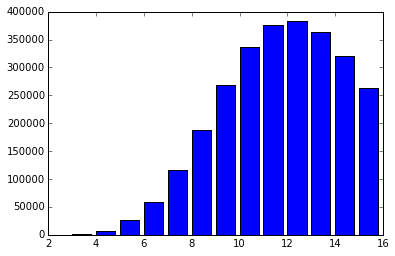

In [43]:
plt.bar(list(dlugosci.keys()), list(dlugosci.values()));

In [46]:
def zlicz_wystapienia(lista):
    slownik = {}
    for x in lista:
        if x in slownik:
            slownik[x] += 1
        else:
            slownik[x] = 1
    return slownik

In [47]:
zlicz_wystapienia(lista1)

{'Ala': 1, 'Python': 1, 'kot': 1, 'pies': 1, 'pyton': 2}

In [55]:
dlugosci = [len(x) for x in slowa]

In [57]:
%%timeit
zlicz_wystapienia(dlugosci)

1 loops, best of 3: 576 ms per loop


In [58]:
%%timeit
Counter(dlugosci)

1 loops, best of 3: 275 ms per loop


In [59]:
pierwsze = Counter([slowo[0] for slowo in slowa])

In [60]:
ostatnie = Counter([slowo[-1] for slowo in slowa])

In [64]:
pierwsze.items()

dict_items([('c', 57907), ('h', 27678), ('i', 23810), ('n', 611326), ('e', 28644), ('b', 68633), ('o', 163399), ('a', 60324), ('k', 122792), ('ź', 593), ('u', 75444), ('ś', 13475), ('ó', 88), ('d', 105516), ('z', 189766), ('t', 60757), ('j', 17337), ('m', 78328), ('p', 396811), ('ł', 11277), ('ć', 1422), ('s', 164409), ('f', 36296), ('g', 46252), ('r', 108067), ('y', 191), ('ę', 1), ('w', 197169), ('ż', 10147), ('l', 32024)])

In [67]:
pierwsze['c']

57907

In [73]:
for q in range(5):
    print(q)

0
1
2
3
4


In [75]:
for klucz, wartosc in pierwsze.items():
    print("Literka: " + klucz)
    print(wartosc - ostatnie[klucz])

Literka: c
45029
Literka: h
-140225
Literka: i
-311896
Literka: n
604158
Literka: e
-293194
Literka: b
68008
Literka: o
7114
Literka: a
-154903
Literka: k
105874
Literka: ź
-234
Literka: u
-75362
Literka: ś
-66130
Literka: ó
88
Literka: d
103950
Literka: z
163228
Literka: t
56179
Literka: j
-99807
Literka: m
-265021
Literka: p
395882
Literka: ł
-10986
Literka: ć
-27181
Literka: s
162466
Literka: f
35865
Literka: g
44932
Literka: r
103970
Literka: y
-372683
Literka: ę
-43325
Literka: w
162731
Literka: ż
-32377
Literka: l
29845


In [72]:
for qqq in pierwsze:
    print("Literka: " + qqq)
    print(pierwsze[qqq] - ostatnie[qqq])

Literka: c
45029
Literka: h
-140225
Literka: i
-311896
Literka: n
604158
Literka: e
-293194
Literka: b
68008
Literka: o
7114
Literka: a
-154903
Literka: k
105874
Literka: ź
-234
Literka: u
-75362
Literka: ś
-66130
Literka: ó
88
Literka: d
103950
Literka: z
163228
Literka: t
56179
Literka: j
-99807
Literka: m
-265021
Literka: p
395882
Literka: ł
-10986
Literka: ć
-27181
Literka: s
162466
Literka: f
35865
Literka: g
44932
Literka: r
103970
Literka: y
-372683
Literka: ę
-43325
Literka: w
162731
Literka: ż
-32377
Literka: l
29845


In [76]:
print(slowa[10])

abadańskie


In [80]:
def zlicz(slowo, lit):
    zliczenia = 0
    for litera in slowo:
        if litera == lit:
            zliczenia += 1
    return zliczenia

In [81]:
zlicz("abrakadabra", "a")

5

In [82]:
for slowo in slowa:
    if zlicz(slowo, 'y') == 6:
        print(slowo)

wybyczyłybyśmy
wypytywałybyśmy
wysypywałybyśmy
wytyczyłybyśmy
wywyższyłybyśmy


In [83]:
ile_z = [zlicz(slowo, "z") for slowo in slowa]

In [86]:
Counter(ile_z)

Counter({0: 1540195, 1: 938106, 2: 209456, 3: 20911, 4: 1152, 5: 62, 6: 1})

In [87]:
max(ile_z)

6

In [88]:
min(ile_z)

0

In [90]:
sum(ile_z)

1424675

In [92]:
lista1

['Ala', 'kot', 'pies', 'pyton', 'Python', 'pyton']

In [95]:
list(enumerate(lista1))

[(0, 'Ala'),
 (1, 'kot'),
 (2, 'pies'),
 (3, 'pyton'),
 (4, 'Python'),
 (5, 'pyton')]

In [93]:
for i, x in enumerate(lista1):
    print(i)
    print(x)

0
Ala
1
kot
2
pies
3
pyton
4
Python
5
pyton


In [97]:
for slowo in slowa:
    if zlicz(slowo, "z") == 6:
        print(slowo)

zbezczeszczasz
zbezczeszczasz
zbezczeszczasz
zbezczeszczasz
1 loops, best of 3: 3.68 s per loop


In [98]:
for i, slowo in enumerate(slowa):
    if ile_z[i] == 6:
        print(slowo)

zbezczeszczasz
zbezczeszczasz
zbezczeszczasz
zbezczeszczasz
1 loops, best of 3: 591 ms per loop


In [99]:
czesto_z = [slowo for slowo in slowa if zlicz(slowo, "z") > 4]

In [101]:
len(czesto_z)

63

In [103]:
czesto_z[-5:]

['zbezczeszczone',
 'zbezczeszczonej',
 'zbezczeszczono',
 'zbezczeszczony',
 'zbezczeszczonym']

In [104]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [106]:
"abcdefghij"[1:-1]

'bcd'

In [108]:
"abcdefghij"[1:-1:3]

'beh'

In [109]:
"abcdefghij"[::2]

'acegi'

In [110]:
"abcdefghij"[1::2]

'bdfhj'

In [113]:
"abcdefghij"[::-1]

'jihgfedcba'

In [114]:
["ala", "kot", "pies"][::-1]

['pies', 'kot', 'ala']

In [116]:
"slowo" == "slowo"[::-1]

False

In [118]:
slowo = "ala"

In [119]:
slowo == slowo[::-1]

True

In [121]:
def palindrom(slowo):
    return slowo == slowo[::-1]

In [122]:
palindromy = [slowo for slowo in slowa if palindrom(slowo)]

In [123]:
len(palindromy)

142

In [127]:
[slowo for slowo in palindromy if len(slowo) > 4]

['anilina',
 'apokopa',
 'imagami',
 'imakami',
 'imamami',
 'imażami',
 'jadaj',
 'jaraj',
 'juroruj',
 'kajak',
 'kanak',
 'karak',
 'karrak',
 'kasak',
 'lunul',
 'łajał',
 'łamał',
 'łapał',
 'łatał',
 'macam',
 'makam',
 'malajalam',
 'melem',
 'mełłem',
 'memem',
 'menem',
 'merem',
 'milim',
 'minim',
 'misim',
 'mocom',
 'modom',
 'mokkom',
 'molom',
 'mołłom',
 'monom',
 'mopom',
 'morom',
 'motetom',
 'mottom',
 'mowom',
 'moxom',
 'mytym',
 'nagan',
 'nizin',
 'okrawarko',
 'owocowo',
 'pokop',
 'potop',
 'radar',
 'rener',
 'reper',
 'rotator',
 'rotor',
 'sedes',
 'senes',
 'telet',
 'tilit',
 'tillit',
 'titit',
 'towot',
 'toyot',
 'ususu',
 'wyryw',
 'wyżyw',
 'zakaz',
 'zaraz']

In [128]:
polskie = "ąęćńłóśźż"

In [132]:
def ile_polskich(slowo):
    liczba = 0
    for literka in slowo:
        if literka in polskie:
            liczba += 1
    return liczba

In [134]:
ile_polskich("żółć")

4

In [135]:
zlicz_polskie = [ile_polskich(slowo) for slowo in slowa]

In [137]:
Counter(zlicz_polskie)

Counter({0: 1293089, 1: 959357, 2: 366406, 3: 79909, 4: 10402, 5: 689, 6: 31})

In [138]:
[slowo for slowo in slowa if ile_polskich(slowo) == 6]

['mosiężnożółtą',
 'nadżółknąłbyś',
 'nadżółknąłeś',
 'nieróżowożółtą',
 'nieżółtoróżową',
 'pożółknąłbyś',
 'pożółknąłeś',
 'półciągłością',
 'półciągłość',
 'półciężarówką',
 'półciężarówkę',
 'półgłośnością',
 'półgłośność',
 'półobłąkańców',
 'półokrągłością',
 'półokrągłość',
 'przeżółknąłbyś',
 'przeżółknąłeś',
 'przyżółknąłbyś',
 'przyżółknąłeś',
 'różowawożółtą',
 'różowożółtą',
 'współdźwięczącą',
 'wyżółknąłbyś',
 'wyżółknąłeś',
 'zżółknąłbyś',
 'zżółknąłeś',
 'żółknąłbyś',
 'żółknąłeś',
 'żółtaworóżową',
 'żółtoróżową']

In [139]:
"abrakadabra".count("a")

5

In [140]:
"niebezpiecznie".startswith("nie")

True

In [141]:
"Ala".startswith("nie")

False

In [145]:
[slowo for slowo in slowa 
 if slowo.endswith("żółty") and slowo.startswith("nie")]

['niebiałożółty',
 'niebladożółty',
 'niebrązowożółty',
 'niebrudnożółty',
 'nieciemnożółty',
 'niejasnożółty',
 'niekremowożółty',
 'niematowożółty',
 'niemiodowożółty',
 'niemlecznożółty',
 'nieochrowożółty',
 'nieognistożółty',
 'niepłowożółty',
 'nierdzawożółty',
 'nieróżowożółty',
 'nierudawożółty',
 'nierudożółty',
 'nieszarożółty',
 'niewoskowożółty',
 'niezielonożółty',
 'niezłotawożółty',
 'niezłotożółty',
 'nieżółty']

In [157]:
[slowo for slowo in slowa if slowo.count("no") > 2]

['denominowano',
 'farnochinonom',
 'farnochinonowi',
 'nominowano',
 'nomokanonom',
 'nomokanonowi',
 'noumenonom',
 'noumenonowi',
 'ponominowano',
 'zdenominowano']

### Zadania

* Palindromy
* Najwięcej polskich znaków?
* Najwięcej różnych polskich znaków?
* Słowa:
    * zaczynające się od (`.startswith(poczatek)`)
    * kończące się na (`.endswith(koniec)`)
    * zawierające (`.counts(podslowo)`)
* Punkty w Scrabble lub Literaki a częstość występowania

# W pustyni i w puszczy

ze zbioru [Wolne Lektury](https://wolnelektury.pl/)

In [158]:
import requests

In [159]:
tekst = requests.get("https://wolnelektury.pl/media/book/txt/w-pustyni-i-w-puszczy.txt").content.decode('utf8')

In [164]:
# jak nie ma internetu a plik jest na dysku to
tekst = open("../dane_surowe/w-pustyni-i-w-puszczy.txt",
             encoding="utf8").read()

In [166]:
len(tekst)

638803

In [165]:
tekst[:500]

'Henryk Sienkiewicz\n\nW pustyni i w puszczy\n\n\n\n\n\nROZDZIAŁ I\n\n— Wiesz, Nel — mówił Staś Tarkowski do swojej przyjaciółki, małej Angielki — wczoraj przyszli zabtie (policjanci) i aresztowali żonę dozorcy Smaina i jej troje dzieci — tę Fatmę, która już kilka razy przychodziła do biura do twojego ojca i do mego.\n\nA mała, podobna do ślicznego obrazka Nel podniosła swe zielonawe oczy na Stasia i zapytała na wpół ze zdziwieniem, a na wpół ze strachem:\n\n— Wzięli ją do więzienia?\n\n— Nie, ale nie pozwolili '

In [23]:
print(tekst[:500])

Henryk Sienkiewicz

W pustyni i w puszczy





ROZDZIAŁ I

— Wiesz, Nel — mówił Staś Tarkowski do swojej przyjaciółki, małej Angielki — wczoraj przyszli zabtie (policjanci) i aresztowali żonę dozorcy Smaina i jej troje dzieci — tę Fatmę, która już kilka razy przychodziła do biura do twojego ojca i do mego.

A mała, podobna do ślicznego obrazka Nel podniosła swe zielonawe oczy na Stasia i zapytała na wpół ze zdziwieniem, a na wpół ze strachem:

— Wzięli ją do więzienia?

— Nie, ale nie pozwolili 


In [167]:
slowa = tekst.split()

In [168]:
slowa[:5]

['Henryk', 'Sienkiewicz', 'W', 'pustyni', 'i']

In [169]:
len(slowa)

102226

In [170]:
slowa_mniejsze = [slowo.lower() for slowo in slowa]

In [172]:
Counter(slowa_mniejsze).most_common(20)

[('i', 4030),
 ('się', 2544),
 ('—', 2486),
 ('w', 2225),
 ('na', 1988),
 ('nie', 1893),
 ('z', 1755),
 ('że', 1393),
 ('do', 1202),
 ('a', 1038),
 ('ale', 782),
 ('to', 781),
 ('po', 726),
 ('jak', 540),
 ('staś', 513),
 ('o', 490),
 ('tak', 432),
 ('od', 426),
 ('za', 410),
 ('co', 394)]

In [173]:
wlasne = [slowo for slowo in slowa if slowo != slowo.lower()]

In [178]:
zbior_slow = set(slowa_mniejsze)

In [187]:
slowa_normalne = set([slowo for slowo in slowa
                      if slowo == slowo.lower()])

In [180]:
set(["Ala", "kot", "kot", "Python"])

{'Ala', 'Python', 'kot'}

In [188]:
wlasne2 = [slowo for slowo in slowa if slowo.lower() not in slowa_normalne]

In [189]:
Counter(wlasne2).most_common()

[('Staś', 513),
 ('Nel', 320),
 ('Kali', 204),
 ('Nel,', 133),
 ('Stasia', 111),
 ('Idrys', 100),
 ('Staś.', 70),
 ('Gebhr', 60),
 ('Nel.', 60),
 ('Mahdi', 57),
 ('Chamis', 50),
 ('ROZDZIAŁ', 46),
 ('Stasia,', 44),
 ('Kalego', 44),
 ('Staś,', 42),
 ('Stasiowi', 41),
 ('Rawlison', 40),
 ('Beduini', 40),
 ('Mzimu', 40),
 ('Saba', 38),
 ('Murzyni', 32),
 ('Bóg', 31),
 ('Kali,', 31),
 ('Tarkowski', 31),
 ('Jakoż', 30),
 ('Smain', 30),
 ('Kalego,', 30),
 ('Mahdiego', 29),
 ('Murzyn', 29),
 ('Mea', 28),
 ('Dinah', 26),
 ('Gebhra', 24),
 ('Mahdiego,', 24),
 ('Faszody', 23),
 ('Murzynów', 23),
 ('Gebhra,', 23),
 ('Arabowie', 22),
 ('Mzimu,', 22),
 ('Smaina', 22),
 ('Sudańczycy', 22),
 ('King', 21),
 ('Chartumu', 20),
 ('Nilu', 20),
 ('Wa-hima', 20),
 ('Idrysa', 19),
 ('Stasiu,', 19),
 ('Kinga', 18),
 ('Lindego', 18),
 ('Mahdiego.', 18),
 ('Nel!', 18),
 ('Medinet', 18),
 ('Medinet.', 17),
 ('Kalemu', 17),
 ('Linde', 17),
 ('Saba,', 16),
 ('Nilu,', 16),
 ('Arabów', 15),
 ('Rawlison.', 15),
 ('Ni

In [27]:
kolory = ["zielony", "czerwony", "niebieski"]
sprowadzmy_do_korzenia = {"czerwonym": "czerwony",
                          "czerwonymi": "czerwony",
                          "zielonym": "zielony",
                          "zielonymi": "zielony"}

### Zadania

* Czy słowo występuje?
* Jakie są najczęstsze nazwy własne?
* Jak usunąć te (cholerne) kropki i przecinki?
* Na jakich pozycjach występuje imię "Kali"?
* Jakie są odmiany słowa "Kali"?

## Zobacz też

* [Unicode character table](http://unicode-table.com/en/)
* [Ł - computer usage](https://en.wikipedia.org/wiki/%C5%81#Computer_usage) - `Ł` w różnych kodowaniach znaków
* [Project Gutenberg](https://www.gutenberg.org/)